In [ ]:
import pickle
import time

import cv2

In [ ]:
from Senate import senatePTREntry, transaction


In [1]:
from pdf2image import convert_from_path
from img2table.document import Image, PDF
from img2table.ocr.tesseract import TesseractOCR
from PIL import Image as im
import numpy as np
import pandas as pd
from PIL import ImageOps
ocr = TesseractOCR()

In [2]:
import pytesseract
from pytesseract import Output
import cv2
from PIL import ImageFilter

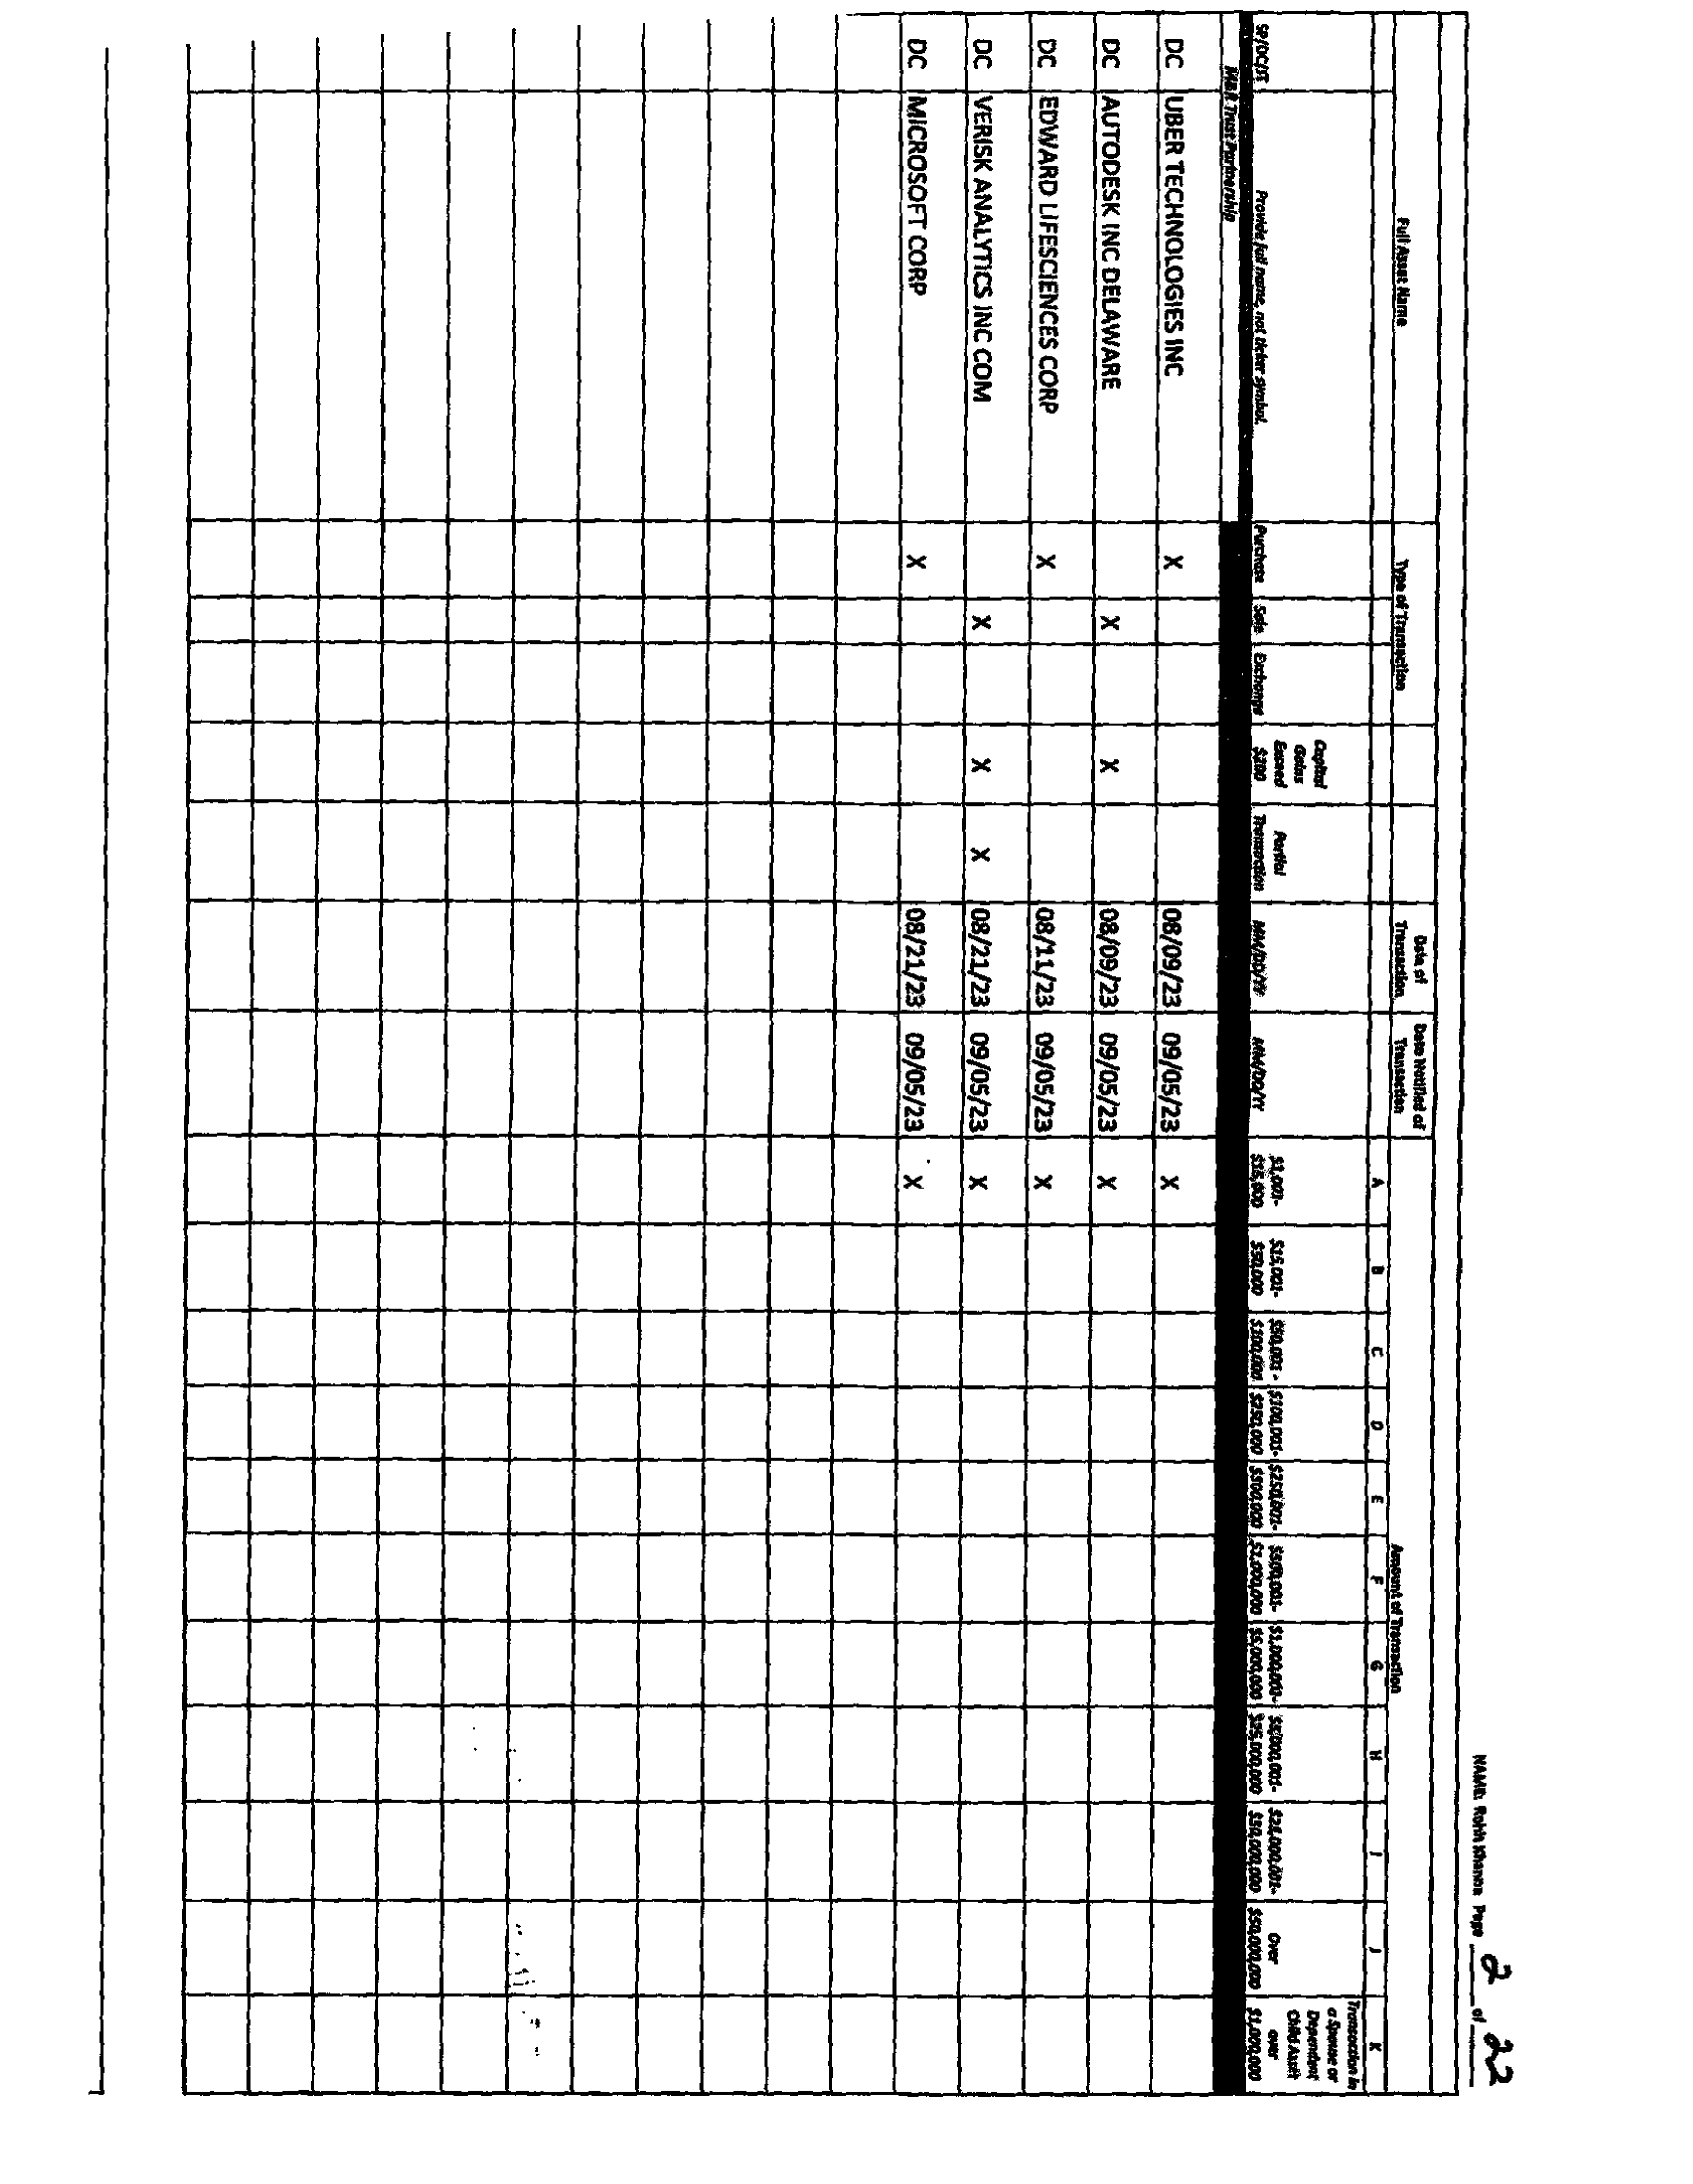

In [35]:
pdf = convert_from_path('./not_parse_able/8219953.pdf',dpi=400,poppler_path='POPPLER/poppler-23.08.0/Library/bin')
pdf[1]

In [ ]:
pdf[2]

In [36]:
pil_image= pdf[2]
def determine_orientation(imgs:list[im.Image]):
    bins = [0,0,0,0]
    count = 0
    for x in imgs:
        #pil_image= pil_image.transpose(im.ROTATE_90)
        if count >10:
            break
        open_cv_image = np.array(x.convert('RGB'))
    # Convert RGB to BGR
        open_cv_image = open_cv_image[:, :, ::-1].copy()
        rgb = cv2.cvtColor(open_cv_image,cv2.COLOR_RGB2BGR)
        results = pytesseract.image_to_osd(rgb,output_type=Output.DICT)
        rotation = int(results["rotate"]/90 )
        bins[rotation] = bins[rotation] + 1
        max_val = max(bins)
    print(bins)
    idx_max = bins.index(max_val)*90
    return idx_max



In [37]:
def alter_orientation(imgs:list[im.Image],orientation):
    if orientation == 0:
        for x in range(len(imgs)):
            imgs[x].save('./temp_images/page'+str(x+33)+'.jpg')
        return imgs
    switcher = {
        '90':im.ROTATE_90,
        '180':im.ROTATE_180,
        '270':im.ROTATE_270
    }
    new_orientation = switcher.get(str(orientation),0)
    new_img_list = []
    for x in range(len(imgs)):
        transposed= imgs[x].transpose(new_orientation)
        #transposed = ImageOps.exif_transpose(transposed)
        transposed.filter(ImageFilter.GaussianBlur(radius=9))
        transposed.save('./temp_images/page'+str(x+33)+'.jpg')
        new_img_list.append(transposed)
    return new_img_list


In [ ]:
def save_images(imgs):
    for x in range(len(imgs)):
        pil_image:im.Image = pdf[x]
        pil_image.filter(ImageFilte)
        pil_image.convert('RGB').save('./temp_images/page'+str(x)+'.jpg')
    return len(imgs)


In [38]:
alt = alter_orientation(pdf,determine_orientation(pdf))

[6, 14, 1, 1]


C:\Users\Nathan\AppData\Local\Temp\ipykernel_11036\1668774580.py:7: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  '90':im.ROTATE_90,
C:\Users\Nathan\AppData\Local\Temp\ipykernel_11036\1668774580.py:8: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  '180':im.ROTATE_180,
C:\Users\Nathan\AppData\Local\Temp\ipykernel_11036\1668774580.py:9: DeprecationWarning: ROTATE_270 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_270 instead.
  '270':im.ROTATE_270


In [ ]:
im.open('./temp_images/page0.jpg').size

In [32]:
table = Image('./temp_images/page34.jpg').extract_tables(ocr=ocr,implicit_rows=True,borderless_tables=False,min_confidence=25)


In [33]:
table[0].df



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,...,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,Khanna Page,None,None
1,None,None,None,None,None,None,None,None,None,None,...,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction,Amount of Transaction
2,None,None,None,None,None,None,None,None,None,None,...,"$50,001 -\n00,000","$50,001 -\n00,000",me,"00,000",None,"$1,000,001-\nCOU fA","$5,000,001-\n000.000",None,None,K\nTransaction\nIn @ Spouse or\nDependent\nChi...
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"$5,000,001-\n000.000",None,None,K\nTransaction\nIn @ Spouse or\nDependent\nChi...
4,None,SP___|GlobailongShortPartners,SP___|GlobailongShortPartners,None,None,None,None,None,fUl,fUl,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,Ritu,Declaration of Trust,Declaration of Trust,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Ritu,of Trust,of Trust,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,SP,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,:,:,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
img = cv2.imread('temp_images/page1.jpg',0).astype("uint8")


In [12]:
import matplotlib.pyplot as plt

In [ ]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

In [ ]:
img_bin1 = img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [ ]:
img_bin2 = img
thresh1, img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu, cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [ ]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[0]//150))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
eroded_image = cv2.erode(img, vertical_kernel, iterations=5)
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)
plotting = plt.imshow(vertical_lines, cmap='gray')
plt.show()

In [ ]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,np.array(img).shape[0]//3000))
image_2 = cv2.erode(img, hor_kernel, iterations=5)
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=5)
plotting = plt.imshow(horizontal_lines, cmap='gray')
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

In [ ]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)

In [ ]:
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image = cv2.bitwise_not(cv2.bitwise_xor(img,vertical_horizontal_lines))
plotting = plt.imshow(b_image,cmap='gray')
plt.show()

In [2]:
import keras_ocr
import math

In [17]:
pipeline = keras_ocr.pipeline.Pipeline(scale=3)

Looking for C:\Users\Nathan\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Nathan\.keras-ocr\crnn_kurapan.h5


In [ ]:
image = [keras_ocr.tools.read('temp_images/page1.jpg')]
pipeline.recognize(image)

In [16]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
def inpaint_text(img, prediction_groups):
    mask = np.zeros(img.shape[:2], dtype="uint8")
    print(len(prediction_groups[0]))
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]

        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 128, thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)


In [18]:
p = pipeline.recognize([keras_ocr.tools.read('temp_images/page1.jpg'),keras_ocr.tools.read('temp_images/page2.jpg')])

10/10 [==============================] - 23s 2s/step


In [19]:
images = [keras_ocr.tools.read('temp_images/page1.jpg'),keras_ocr.tools.read('temp_images/page2.jpg')]


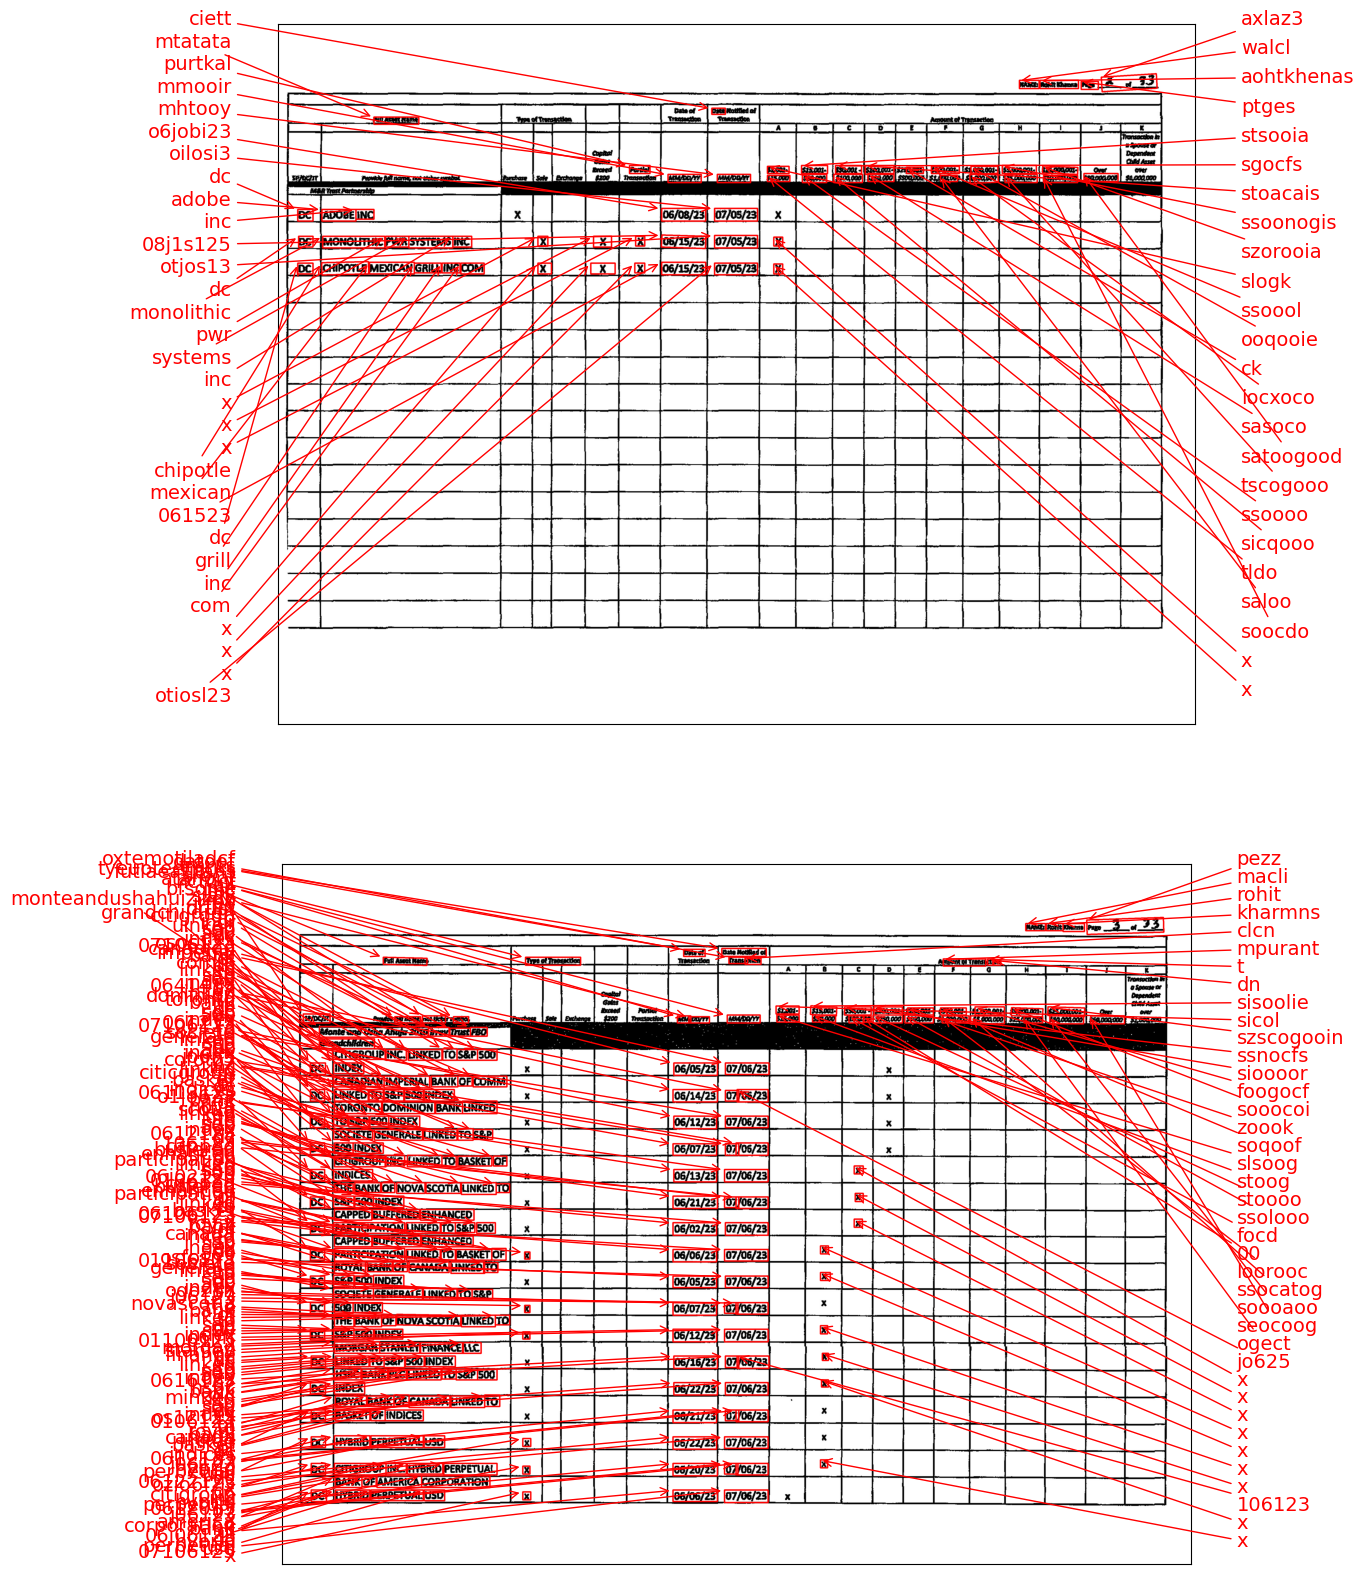

In [20]:
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 20))
for ax, image, predictions in zip(axs, images, p):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [26]:
import pytesseract

In [49]:
config = r' --oem 3'
p = pytesseract.image_to_string('temp_images/page1.jpg',config=config)
p

'z Amount of\nA a\n\nMONOLITHIC PWR SYSTEMS INC\n\nCHIPOTLE MEXICAN GRILL INC COM\n\n'